<center> <h1>[INFO-F305] - Modélisation et Simulation - Projet Octave<br><br>Alexandre HENEFFE<br>Ricardo GOMES RODRIGUES<br><br>Novembre 2018</h1> </center>


# Introduction
Dans le cadre de ce projet, nous sommes amenés à 

ans =

   3.2518e-17 + 1.5701e-16i
   3.2518e-17 - 1.5701e-16i

ans = 0
ans = 0


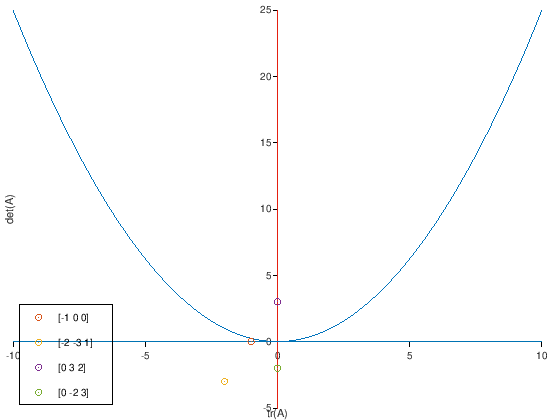

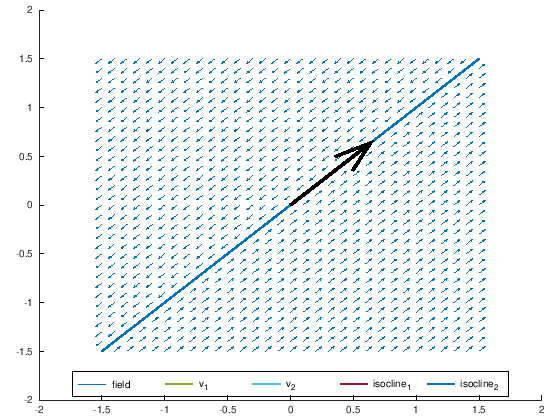

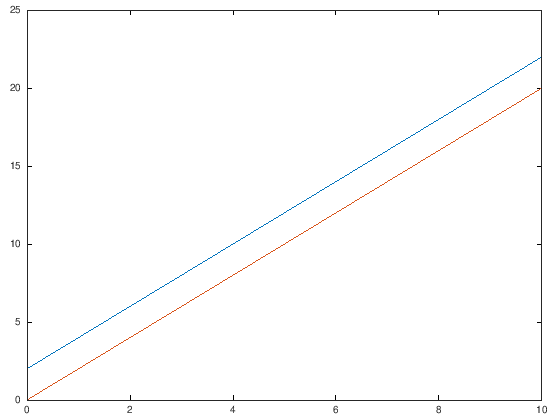

In [2]:
function [t,x] = system_simulation(A, init)
    ode_sys = @(t,x) [A(1,1)*x(1)+A(1,2)*x(2);A(2,1)*x(1)+A(2,2)*x(2)]; # Définition système
    %[t,x] = ode23 (ode_sys, [0, 10], [2, 0]); # Résolution système
    [t,x] = ode23 (ode_sys, [0, 10], init); # Résolution système
endfunction

# 2. Dessiner les droites correspondants aux vecteurs propres et le sense des trajectoires associés
function [eigenline_1,eigenline_2,V] = compute_eigenlines(A,line_range)
    [V,L] = eig(A);
    eigenline_1 = (V(2,1)/V(1,1)) * line_range;
    eigenline_2 = (V(2,2)/V(1,2)) * line_range;
endfunction

# 3. Calculer les isoclines
function [isocline_1,isocline_2] = compute_isoclines(A,line_range)
    isocline_1 = -(A(1,1)/A(1,2)) * line_range;
    isocline_2 = -(A(2,1)/A(2,2)) * line_range;
endfunction

# 4. Portrait de phase complet
function [x1,x2,x1p,x2p] = plot_portrait_phase_complete(A)
    #grid for plotting
    x1range=-1.5:.1:1.5;
    x2range=-1.5:.1:1.5;
    [x1,x2] = meshgrid(x1range, x2range);


    # Define the system to plot (based on matrix A)
    x1p = A(1,1)*x1+A(1,2)*x2;
    x2p = A(2,1)*x1+A(2,2)*x2;

    #Normalize values for plotting
    norms=sqrt(x1p.^2+x2p.^2);
    
    figure(2)
    [eigenline_1,eigenline_2,V] = compute_eigenlines(A,x1range);
    [isocline_1,isocline_2] = compute_isoclines(A,x1range);
    
    # Vector field plot
    hold on;
    quiver(x1,x2,x1p./norms,x2p./norms,0.5);
    # Isoclines
    plot(x1range,isocline_1,"linewidth",5);
    plot(x1range,isocline_2,"linewidth",5);
    # Vecteurs propres
    plot(x1range,eigenline_1,"linewidth",5);
    plot(x1range,eigenline_2,"linewidth",5);
    quiver([0;0],[0;0],V(1,:),V(2,:),"linewidth",10,"color","k");
    legend("field","v_1","v_2","isocline_1","isocline_2","location","south","orientation", "horizontal");
    
endfunction
figure(3)
x = -10:0.1:10;
plot (x, 1/4*x.^2);
hold on;
%A_vec = [[-2 1; 1 -2];[2 1; 2 3];[5 9; 6 2];[0 1; 0 1];[0 -1; 1 0];[1/3 -2; 3 -1]]; #cbind like
A_vec =  [[1 -1; 0 0];[1 -1; -1 1];[1 -1; 1 -1];[0 1;-1 0]];
A_vec = [[-1 0; 0 0];[-1 0; 0 -1];[-1 0; 0 1];[0 -1; 0 0]];
A_vec = [[2 2; 0 0];[2 2; 2 2];[2 2; -2 -2];[0 2; 2 0]] ;
A_vec = [[-1 -2; 0 0];[-1 -2; -2 -1];[-1 -2; 2 1];[0 -1; -2 0]] ;
i = 0;
while i<(rows(A_vec)/2)# Column-wise iteration
    A = A_vec(2*i+1:2*(i+1),1:2); # Get the proper submatrix
    plot(trace(A),det(A),sprintf(";[%d %d %d];o",trace(A),det(A), i))
    i++;
endwhile
set(gca, "xaxislocation", "origin");
set(gca, "yaxislocation", "origin");
h = legend; legend(h,"location","southwest");
xlabel("tr(A)");
ylabel("det(A)");
box off;
hold off;
A =  [1 -1; 1 -1];
eig(A)
det(A)
[t,x] = system_simulation(A, [2; 0]);
figure(1)
plot(t,x)
[x1,x2,x1p,x2p] = plot_portrait_phase_complete(A);